In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
import pickle
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Load the dataset
data = pd.read_csv('spam_assassin.csv', encoding='latin-1')

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize
    text = [ps.stem(word) for word in text if word not in stop_words]
    return ' '.join(text)

data['text'] = data['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['text']).toarray()
y = data['target'].values

In [7]:
data.isnull().sum()

text      0
target    0
dtype: int64

In [8]:
data.duplicated().sum()

467

In [9]:
data = data.drop_duplicates(keep='first')

In [10]:
data.duplicated().sum()

0

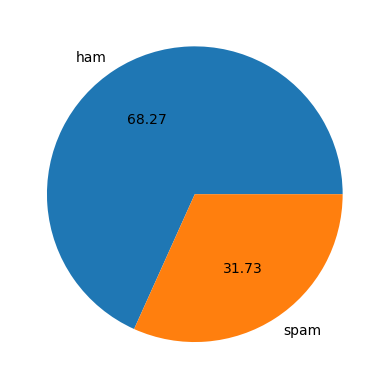

In [11]:
plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [12]:
data['num_characters'] = data['text'].apply(lambda x: len(x) if isinstance(x, str) else 0)

In [13]:
data

,text,target,num_characters
0,ilug admin linux ie mon jul 29 11 28 02 2002 r...,0,2940
1,gort44 excit com mon jun 24 17 54 21 2002 retu...,1,1436
2,fork admin xent com mon jul 29 11 39 57 2002 r...,1,2805
3,dcm123 btamail net cn mon jun 24 17 49 23 2002...,1,1649
4,ilug admin linux ie mon aug 19 11 02 47 2002 r...,0,2346
...,...,...,...
5791,ilug admin linux ie mon jul 22 18 12 45 2002 r...,0,2839
5792,fork admin xent com mon oct 7 20 37 02 2002 re...,0,2403
5793,receiv hq pro ns net localhost 127 0 0 1 hq pr...,1,4003
5794,razor user admin list sourceforg net thu sep 1...,0,6781


In [14]:
import nltk

# Ensure that 'text' column values are strings, convert non-strings to empty strings
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(str(x))) if isinstance(x, str) else 0)

In [15]:
data['num_sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(str(x))) if isinstance(x, str) else 0)

In [16]:
data.columns

Index(['text', 'target', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [17]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5329.000000,5329.000000,5329.0
mean,3195.255207,560.349221,1.0
std,5267.906882,518.851930,0.0
min,289.000000,56.000000,1.0
25%,1837.000000,344.000000,1.0
50%,2539.000000,471.000000,1.0
75%,3432.000000,617.000000,1.0
max,230292.000000,9019.000000,1.0


In [18]:
# ham
data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3638.000000,3638.000000,3638.0
mean,2622.080264,477.340022,1.0
std,2026.119065,320.894962,0.0
min,289.000000,56.000000,1.0
25%,1890.250000,364.000000,1.0
50%,2484.000000,465.000000,1.0
75%,3129.750000,567.000000,1.0
max,55376.000000,9019.000000,1.0


In [19]:
#spam
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1691.000000,1691.000000,1691.0
mean,4428.377883,738.934358,1.0
std,8742.182274,761.819497,0.0
min,576.000000,102.000000,1.0
25%,1773.500000,318.500000,1.0
50%,2831.000000,502.000000,1.0
75%,4836.500000,893.500000,1.0
max,230292.000000,8690.000000,1.0


In [20]:
data.head()

,text,target,num_characters,num_words,num_sentences
0,ilug admin linux ie mon jul 29 11 28 02 2002 r...,0,2940,575,1
1,gort44 excit com mon jun 24 17 54 21 2002 retu...,1,1436,275,1
2,fork admin xent com mon jul 29 11 39 57 2002 r...,1,2805,524,1
3,dcm123 btamail net cn mon jun 24 17 49 23 2002...,1,1649,337,1
4,ilug admin linux ie mon aug 19 11 02 47 2002 r...,0,2346,459,1


In [21]:
data

,text,target,num_characters,num_words,num_sentences
0,ilug admin linux ie mon jul 29 11 28 02 2002 r...,0,2940,575,1
1,gort44 excit com mon jun 24 17 54 21 2002 retu...,1,1436,275,1
2,fork admin xent com mon jul 29 11 39 57 2002 r...,1,2805,524,1
3,dcm123 btamail net cn mon jun 24 17 49 23 2002...,1,1649,337,1
4,ilug admin linux ie mon aug 19 11 02 47 2002 r...,0,2346,459,1
...,...,...,...,...,...
5791,ilug admin linux ie mon jul 22 18 12 45 2002 r...,0,2839,551,1
5792,fork admin xent com mon oct 7 20 37 02 2002 re...,0,2403,449,1
5793,receiv hq pro ns net localhost 127 0 0 1 hq pr...,1,4003,757,1
5794,razor user admin list sourceforg net thu sep 1...,0,6781,1344,1


In [22]:
# Create the 'num_characters' column if it doesn't exist
data['num_characters'] = data['text'].apply(lambda x: len(x) if isinstance(x, str) else 0)

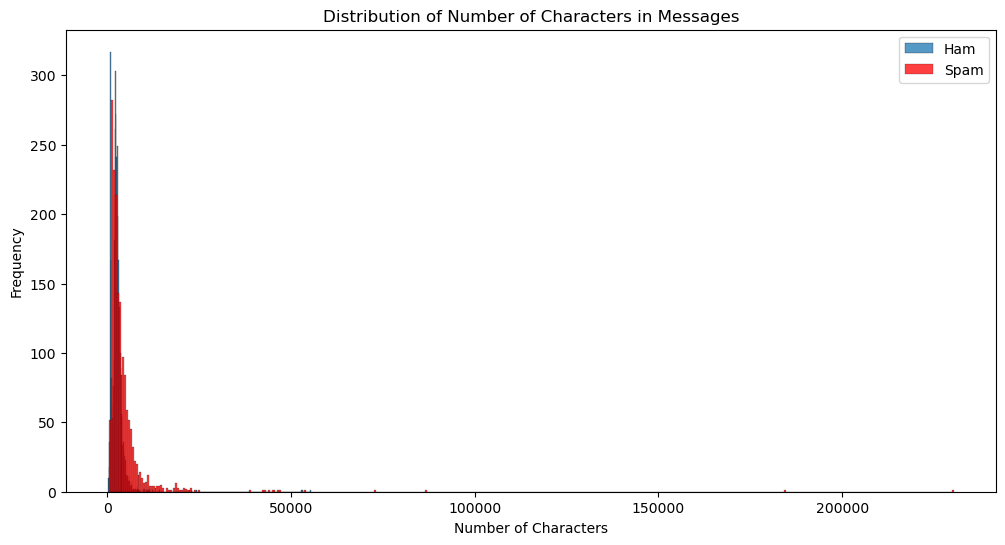

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12,6))

# Plot histograms for ham (target == 0) and spam (target == 1) messages
sns.histplot(data[data['target'] == 0]['num_characters'], label='Ham')
sns.histplot(data[data['target'] == 1]['num_characters'], color='red', label='Spam')

# Add labels and title for better understanding
plt.title('Distribution of Number of Characters in Messages')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Show the legend
plt.legend()

# Show the plot
plt.show()

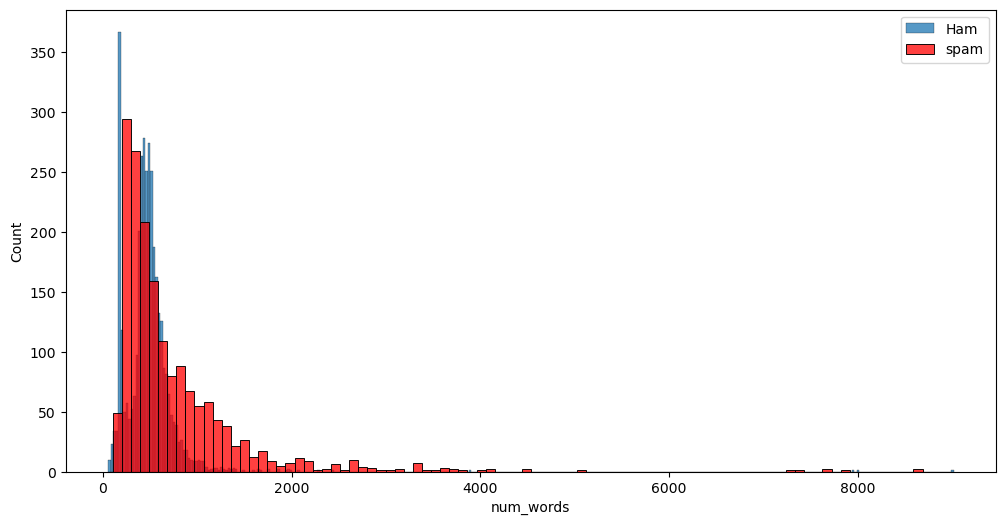

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_words'], label = 'Ham')
sns.histplot(data[data['target'] == 1]['num_words'],color='red', label = 'spam')
# Show the legend
plt.legend()

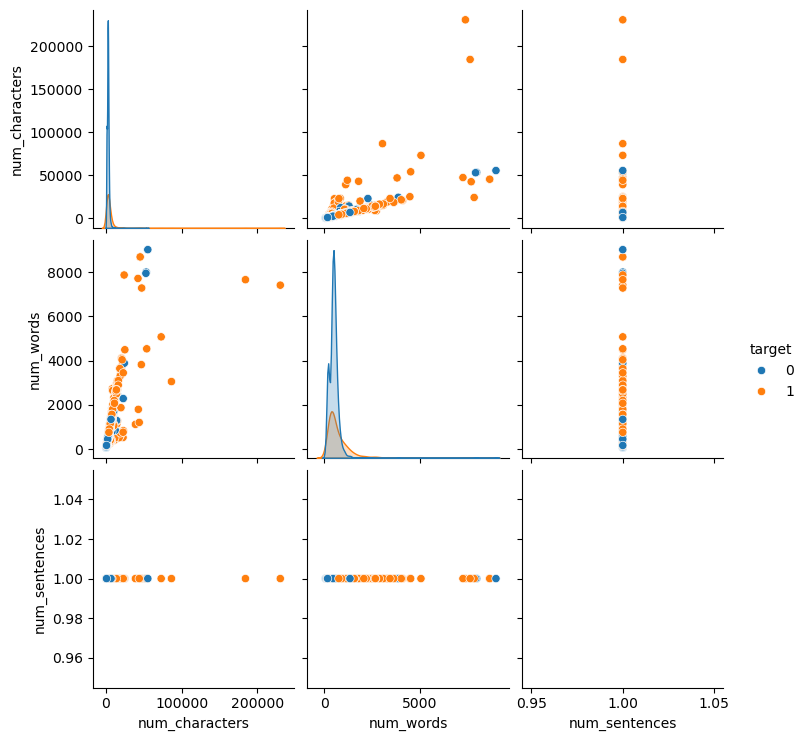

In [25]:
sns.pairplot(data,hue='target')

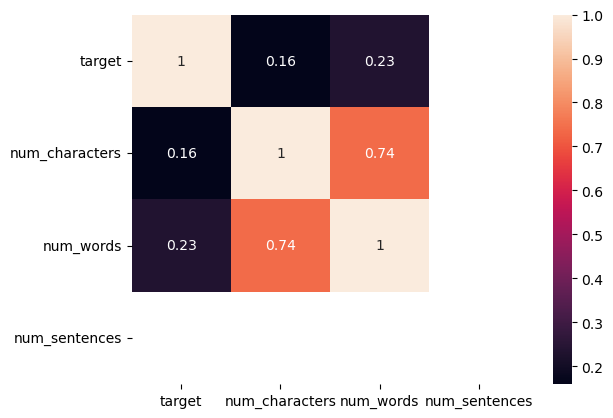

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation and plot the heatmap
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)

# Show the plot
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [29]:
yPred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, yPred)}")
print(classification_report(y_test, yPred, target_names=['Ham', 'Spam']))

Accuracy: 0.9853448275862069
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       779
        Spam       1.00      0.96      0.98       381

    accuracy                           0.99      1160
   macro avg       0.99      0.98      0.98      1160
weighted avg       0.99      0.99      0.99      1160



In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example email text
new_email = ["MIME-Version: 1.0 Content-Type: text/plain; charset=us-ascii Content-Disposition: inline User-Agent: Mutt/1.2.5i In-Reply-To: <0D443C91DCE9CD40B1C795BA222A729E018854FA@milexc01.maxtor.com>; from conor_wynne@maxtor.com on Fri, Jul 26, 2002 at 03:56:22PM +0100 Sender: ilug-admin@linux.ie Errors-To: ilug-admin@linux.ie X-Mailman-Version: 1.1 Precedence: bulk List-Id: Irish Linux Users' Group <ilug.linux.ie> X-Beenthere: ilug@linux.ie On Fri, Jul 26, 2002 at 03:56:22PM +0100 or so it is rumoured hereabouts"]

# Step 1: Preprocess the new email (using the same TF-IDF vectorizer fitted on training data)
new_email_tfidf = vectorizer.transform(new_email).toarray()  # 'vectorizer' is the trained TF-IDF vectorizer

# Step 2: Predict if it's spam or ham using the trained model
prediction = model.predict(new_email_tfidf)

# Step 3: Display the result
if prediction[0] == 1:
    print("This email is spam.")
else:
    print("This email is ham (not spam).")

This email is ham (not spam).


In [31]:
import joblib

joblib.dump(model, 'spam_detector_model.pkl')

['spam_detector_model.pkl']

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)
model = joblib.load('spam_detector_model.pkl')  # Load trained model

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    email_text = data['emailText']
    
    # Preprocess the email text
    vectorized_email = vectorizer.transform([email_text])  # Using the trained vectorizer

    # Make prediction
    prediction = model.predict(vectorized_email)
    result = 'ham(not spam)' if prediction[0] == 0 else 'spam'
    
    return jsonify(result=result)

if __name__ == '__main__':
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [05/Oct/2024 21:30:26] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [05/Oct/2024 21:30:52] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2024 02:43:20] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2024 02:43:37] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2024 02:43:38] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2024 02:43:43] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2024 02:43:45] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2024 02:44:13] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2024 02:44:14] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [06/Oct/2024 02:44:15] "POST /predict HTTP/1.1" 200 -
